# Introduction

This task focuses on predicting medical insurance charges based on personal data
such as age, BMI, smoking status, and more. We'll explore the data, visualize key
features, train a regression model, and evaluate its performance using MAE and RMSE.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Dataset

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Dataset Overview

In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Shape: (1338, 7)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Exploratory Data Analysis (EDA)

## Charges Distribution

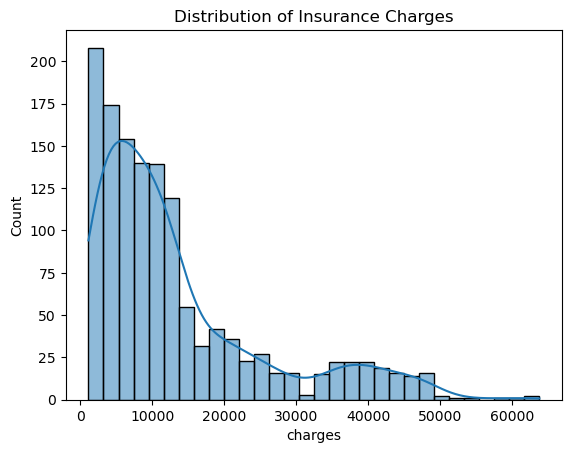

In [4]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

## Charges by Smoker Status

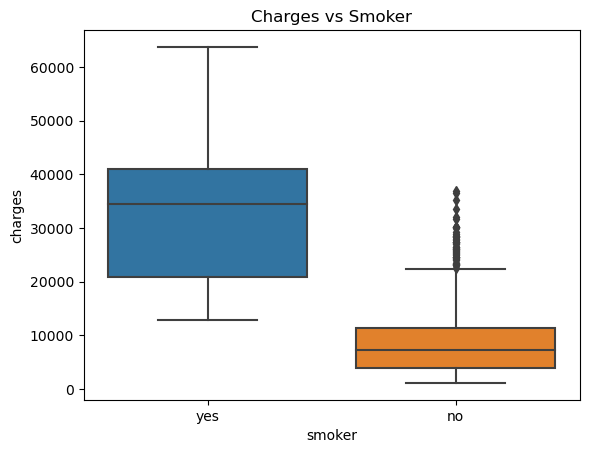

In [5]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Charges vs Smoker")
plt.show()

## Charges by BMI

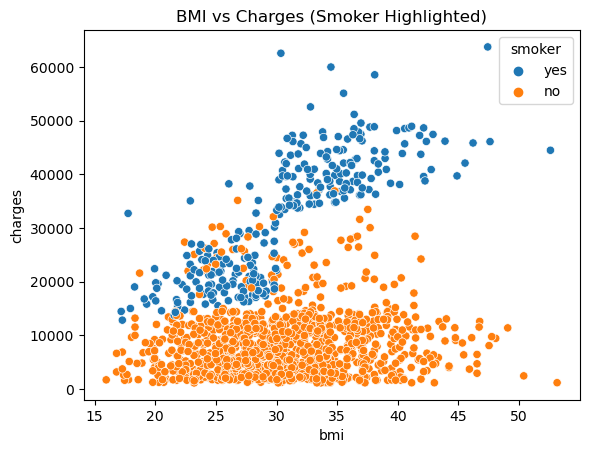

In [6]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()

## Charges by Age

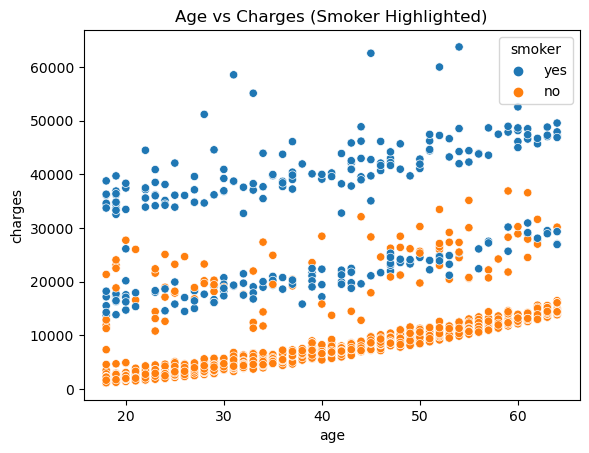

In [7]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges (Smoker Highlighted)")
plt.show()

# Feature Engineering

### Define features and target

In [8]:
X = df.drop('charges', axis=1)
y = df['charges']

### Define categorical and numeric columns

In [9]:
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

### Create preprocessor with OneHotEncoding for categorical features

In [10]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Linear Regression)

In [12]:
# Create pipeline
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Evaluation

In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.194473753654
Root Mean Squared Error (RMSE): 5796.284659276274


# Conclusion

- The Linear Regression model was trained to predict insurance charges.
- MAE: 4181.19
- RMSE: 5796.28
- Smoking status and BMI had strong influence on the predicted cost.
- Scatter plots confirmed higher charges for smokers and those with high BMI.
- Model can be improved further with advanced regression techniques or polynomial features.